In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '428736eb-bc22-417a-b0bf-3336fa423fa1',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-02-18T17:42:52.526Z', 'error_code': 0, 'error_message': None, 'elapsed': 33, 'credit_count': 1, 'notice': None, 'total_count': 8822}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10820, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [2]:
type(data)

dict

In [3]:
import pandas as pd

pd.set_option('display.max_column', None)

In [4]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10820,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.963130e+07,1.963130e+07,False,NaN,1,NaN,NaN,None,2024-02-18T17:42:00.000Z,51947.080802,1.662016e+10,-16.5149,0.308763,1.462938,7.565921,26.781564,18.332425,38.848597,1.019789e+12,51.9915,1.090889e+12,None,2024-02-18T17:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-18 12:42:52.900154
1,1027,Ethereum,ETH,ethereum,8420,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201655e+08,1.201655e+08,True,NaN,2,NaN,NaN,None,2024-02-18T17:42:00.000Z,2818.136650,1.859694e+10,9.0032,0.705260,1.864655,12.097335,14.728038,26.206530,37.906013,3.386427e+11,17.2649,3.386427e+11,None,2024-02-18T17:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-18 12:42:52.900154
2,825,Tether USDt,USDT,tether,74784,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,9.765741e+10,9.960008e+10,True,NaN,3,NaN,NaN,None,2024-02-18T17:41:00.000Z,1.000267,4.430623e+10,0.1479,-0.013934,0.013286,-0.011967,0.145250,-0.003172,0.003720,9.768351e+10,4.9802,9.962670e+10,None,2024-02-18T17:41:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-02-18 12:42:52.900154
3,1839,BNB,BNB,bnb,2067,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.495443e+08,1.495443e+08,False,NaN,4,NaN,NaN,None,2024-02-18T17:41:00.000Z,352.569724,9.374063e+08,-18.6515,0.378558,-0.522846,9.528995,13.533774,35.300702,36.583911,5.272479e+10,2.6882,5.272479e+10,None,2024-02-18T17:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-18 12:42:52.900154
4,5426,Solana,SOL,solana,626,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.407219e+08,5.698756e+08,True,NaN,5,NaN,NaN,None,2024-02-18T17:42:00.000Z,113.909913,1.381785e+09,-3.7740,1.278103,5.872351,4.556584,25.769051,39.094339,95.631810,5.020260e+10,2.5602,6.491449e+10,None,2024-02-18T17:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-18 12:42:52.900154
5,52,XRP,XRP,xrp,1229,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.455860e+10,9.998790e+10,False,NaN,6,NaN,NaN,None,2024-02-18T17:42:00.000Z,0.562136,7.100946e+08,-25.3452,0.498100,2.227391,6.329429,5.355300,-9.469750,-9.174394,3.066936e+10,1.5643,5.621361e+10,None,2024-02-18T17:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-18 12:42:52.900154
6,3408,USDC,USDC,usd-coin,16749,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.809162e+10,2.809162e+10,False,NaN,7,NaN,NaN,None,2024-02-18T17:42:00.000Z,1.000143,3.226112e+09,-19.9448,-0.002124,0.016581,0.020513,0.000890,0.006999,0.017212,2.809564e+10,1.4324,2.809564e+10,None,2024-02-18T17:42:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-02-18 12:42:52.900154
7,2010,Cardano,ADA,cardano,1074,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.545772e+10,3.662821e+10,False,NaN,8,NaN,NaN,None,2024-02-18T17:41:00.000Z,0.621009,7.278511e+08,82.8479,0.278408,6.697249,13.977023,28.232729,3.373188,59.353642,2.201958e+10,1.1233,2.794542e+10,None,2024-02-18T17:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-18 12:42:52.900154
8,5805,Avalanche,AVAX,avalanche,664,2020-07-13T00:00:00.000Z,"[defi, smart-contracts, three-arrows-capital-p...",7.200000e+08

In [5]:

def api_runner():
    global df

    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '428736eb-bc22-417a-b0bf-3336fa423fa1',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    
    
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df_append = pd.DataFrame(df)
    df = pd.concat([df,df_append])
    
    
    
    if not os.path.isfile(r'/Users/rahib/Pandas Tutorial Dats Set/API.csv'):
        df.to_csv(r'/Users/rahib/Pandas Tutorial Dats Set/API.csv', header = 'column_names')
    else:
        df.to_csv(r'/Users/rahib/Pandas Tutorial Dats Set/API.csv', mode = 'a', header =False)

In [6]:
import os
from time import time
from time import sleep

for i in range(2):
    api_runner()
    print('Api runner completed successfully')
    sleep(10)

Api runner completed successfully
Api runner completed successfully


In [7]:
pd.set_option('display.float_format',lambda x: '%.5f' % x)

In [8]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10820,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19631300.00000,19631300.00000,False,NaN,1,NaN,NaN,None,2024-02-18T17:42:00.000Z,51947.08080,16620155353.51691,-16.51490,0.30876,1.46294,7.56592,26.78156,18.33243,38.84860,1019788727344.22290,51.99150,1090888696837.64001,None,2024-02-18T17:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-18 12:43:03.641767
1,1027,Ethereum,ETH,ethereum,8420,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120165454.17797,120165454.17797,True,NaN,2,NaN,NaN,None,2024-02-18T17:42:00.000Z,2818.13665,18596943429.18250,9.00320,0.70526,1.86466,12.09734,14.72804,26.20653,37.90601,338642670426.18365,17.26490,338642670426.17999,None,2024-02-18T17:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-18 12:43:03.641767
2,825,Tether USDt,USDT,tether,74784,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,97657406456.63939,99600078701.92628,True,NaN,3,NaN,NaN,None,2024-02-18T17:41:00.000Z,1.00027,44306229344.66454,0.14790,-0.01393,0.01329,-0.01197,0.14525,-0.00317,0.00372,97683509642.82170,4.98020,99626701151.70000,None,2024-02-18T17:41:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-02-18 12:43:03.641767
3,1839,BNB,BNB,bnb,2067,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,149544292.41674,149544292.41674,False,NaN,4,NaN,NaN,None,2024-02-18T17:41:00.000Z,352.56972,937406272.44322,-18.65150,0.37856,-0.52285,9.52900,13.53377,35.30070,36.58391,52724789915.94802,2.68820,52724789915.95000,None,2024-02-18T17:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-18 12:43:03.641767
4,5426,Solana,SOL,solana,626,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,440721948.24628,569875643.95632,True,NaN,5,NaN,NaN,None,2024-02-18T17:42:00.000Z,113.90991,1381784658.19782,-3.77400,1.27810,5.87235,4.55658,25.76905,39.09434,95.63181,50202598991.71377,2.56020,64914485295.15000,None,2024-02-18T17:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-18 12:43:03.641767
5,52,XRP,XRP,xrp,1229,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,54558598490.00000,99987895338.00000,False,NaN,6,NaN,NaN,None,2024-02-18T17:42:00.000Z,0.56214,710094551.44819,-25.34520,0.49810,2.22739,6.32943,5.35530,-9.46975,-9.17439,30669358464.42135,1.56430,56213611260.64000,None,2024-02-18T17:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-18 12:43:03.641767
6,3408,USDC,USDC,usd-coin,16749,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,28091621535.87960,28091621535.87960,False,NaN,7,NaN,NaN,None,2024-02-18T17:42:00.000Z,1.00014,3226111785.75826,-19.94480,-0.00212,0.01658,0.02051,0.00089,0.00700,0.01721,28095635919.82773,1.43240,28095635919.83000,None,2024-02-18T17:42:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-02-18 12:43:03.641767
7,2010,Cardano,ADA,cardano,1074,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35457724751.33000,36628205944.37800,False,NaN,8,NaN,NaN,None,2024-02-18T17:41:00.000Z,0.62101,727851148.73969,82.84790,0.27841,6.69725,13.97702,28.23273,3.37319,59.35364,22019581663.73546,1.12330,27945424637.85000,None,2024-02-18T17:41:00.000Z,NaN,NaN,NaN

In [9]:
df3 = df.groupby('name', sort =False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.30876,1.46294,7.56592,26.78156,18.33243,38.84860
Ethereum,0.70526,1.86466,12.09734,14.72804,26.20653,37.90601
Tether USDt,-0.01393,0.01329,-0.01197,0.14525,-0.00317,0.00372
BNB,0.37856,-0.52285,9.52900,13.53377,35.30070,36.58391
Solana,1.27810,5.87235,4.55658,25.76905,39.09434,95.63181
XRP,0.49810,2.22739,6.32943,5.35530,-9.46975,-9.17439
USDC,-0.00212,0.01658,0.02051,0.00089,0.00700,0.01721
Cardano,0.27841,6.69725,13.97702,28.23273,3.37319,59.35364
Avalanche,0.96456,2.92663,1.31502,26.85516,-6.67498,87.77306


In [10]:
df4 = df3.stack()
df4

name                                 
Bitcoin  quote.USD.percent_change_1h     0.30876
         quote.USD.percent_change_24h    1.46294
         quote.USD.percent_change_7d     7.56592
         quote.USD.percent_change_30d   26.78156
         quote.USD.percent_change_60d   18.33243
                                          ...   
Toncoin  quote.USD.percent_change_24h    3.22789
         quote.USD.percent_change_7d     8.90361
         quote.USD.percent_change_30d    4.00524
         quote.USD.percent_change_60d    2.91380
         quote.USD.percent_change_90d   -3.11840
Length: 90, dtype: float64

In [11]:
df5 = df4.to_frame(name = 'values')
df5

values
name                                         
Bitcoin quote.USD.percent_change_1h   0.30876
        quote.USD.percent_change_24h  1.46294
        quote.USD.percent_change_7d   7.56592
        quote.USD.percent_change_30d 26.78156
        quote.USD.percent_change_60d 18.33243
...                                       ...
Toncoin quote.USD.percent_change_24h  3.22789
        quote.USD.percent_change_7d   8.90361
        quote.USD.percent_change_30d  4.00524
        quote.USD.percent_change_60d  2.91380
        quote.USD.percent_change_90d -3.11840

[90 rows x 1 columns]

In [12]:
index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.30876
1,Bitcoin,quote.USD.percent_change_24h,1.46294
2,Bitcoin,quote.USD.percent_change_7d,7.56592
3,Bitcoin,quote.USD.percent_change_30d,26.78156
4,Bitcoin,quote.USD.percent_change_60d,18.33243
...,...,...,...
85,Toncoin,quote.USD.percent_change_24h,3.22789
86,Toncoin,quote.USD.percent_change_7d,8.90361
87,Toncoin,quote.USD.percent_change_30d,4.00524
88,Toncoin,quote.USD.percent_change_60d,2.91380


In [13]:
df7 = df6.rename(columns = {'level_1' : 'percent change'} )
df7

,name,percent change,values
0,Bitcoin,quote.USD.percent_change_1h,0.30876
1,Bitcoin,quote.USD.percent_change_24h,1.46294
2,Bitcoin,quote.USD.percent_change_7d,7.56592
3,Bitcoin,quote.USD.percent_change_30d,26.78156
4,Bitcoin,quote.USD.percent_change_60d,18.33243
...,...,...,...
85,Toncoin,quote.USD.percent_change_24h,3.22789
86,Toncoin,quote.USD.percent_change_7d,8.90361
87,Toncoin,quote.USD.percent_change_30d,4.00524
88,Toncoin,quote.USD.percent_change_60d,2.91380


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
df7['percent change'] = df7['percent change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_60d','quote.USD.percent_change_30d','quote.USD.percent_change_90d'], ['1h','24h','7d','60d','30d', '90d'])
df7

,name,percent change,values
0,Bitcoin,1h,0.30876
1,Bitcoin,24h,1.46294
2,Bitcoin,7d,7.56592
3,Bitcoin,30d,26.78156
4,Bitcoin,60d,18.33243
...,...,...,...
85,Toncoin,24h,3.22789
86,Toncoin,7d,8.90361
87,Toncoin,30d,4.00524
88,Toncoin,60d,2.91380


/Users/rahib/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


False

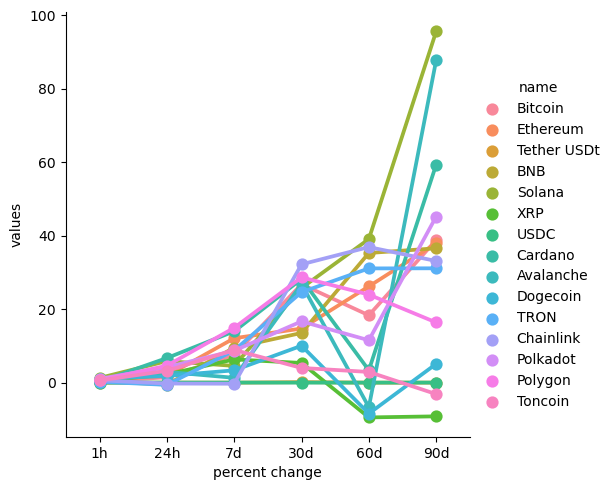

In [22]:
'catplot'==sns.catplot(x ='percent change', y ='values', hue='name', data=df7, kind='point')

In [25]:
catplot.savefig('catplot')